In [ ]:
#Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import Library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Read Dataset
df = pd.read_csv("/content/drive/MyDrive/Penambangan Data/Tugas Project Based Learning/depression_dataset_reddit_cleaned.csv")
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


# Data Exploration

In [ ]:
df.shape

(7731, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_text     7731 non-null   object
 1   is_depression  7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


In [ ]:
duplicate = df[df.duplicated()]
duplicate

,clean_text,is_depression
259,hi i wa wondering if anyone ha this happen to ...,1
468,i want to be dead ive been suicidal for year i...,1
508,i want to be dead ive been suicidal for year i...,1
606,i want to be dead ive been suicidal for year i...,1
747,ha anyone been prescribed mirtazapine or other...,1
...,...,...
7184,just been given ma marching order got ta go do...,0
7191,just been given ma marching order got ta go do...,0
7198,doing homework,0
7574,i m not liking that new itunes pricing at all ...,0




*   Delete Duplicated Data





In [ ]:
df2 = df.drop_duplicates(keep=False)
df2.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [ ]:
duplicate = df2[df2.duplicated()]
duplicate

,clean_text,is_depression


In [ ]:
df2.shape

(7597, 2)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7597 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_text     7597 non-null   object
 1   is_depression  7597 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 178.1+ KB


In [ ]:
#Cek isi label
df2['is_depression'].unique()

array([1, 0])

In [ ]:
#Cek Jumlah label
df2['is_depression'].value_counts()

0    3879
1    3718
Name: is_depression, dtype: int64

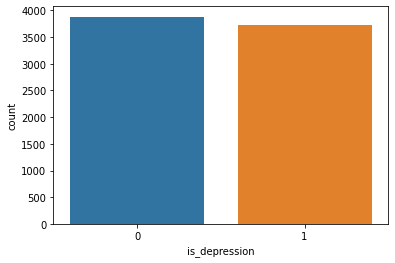

In [ ]:
sns.countplot(data=df2, x='is_depression')



*   Balancing Data



In [ ]:
#Menghapus Sebagian Data berlabel "0" Agar Seimbang
df_balanced = (df2.groupby('is_depression', as_index=False)
              .apply(lambda x: x.sample(n=3718))
              .reset_index(drop=True))
df_balanced.head()

,clean_text,is_depression
0,tuesday is a raining day again,0
1,moving on to managerial finance nicht gut,0
2,akianz renting but very cheap renting and awes...,0
3,is missing his favourite friend,0
4,just saw little and huge stingray in foot deep...,0


In [ ]:
#Cek isi label
df_balanced['is_depression'].unique()

array([0, 1])

In [ ]:
#Cek Jumlah label
df_balanced['is_depression'].value_counts()

0    3718
1    3718
Name: is_depression, dtype: int64

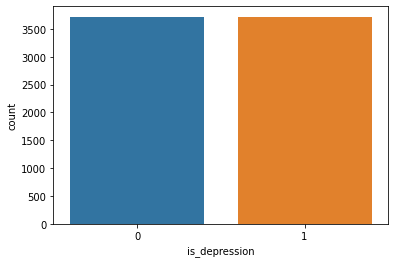

In [ ]:
sns.countplot(data=df_balanced, x='is_depression')

In [ ]:
df_balanced.shape

(7436, 2)

In [ ]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7436 entries, 0 to 7435
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_text     7436 non-null   object
 1   is_depression  7436 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 116.3+ KB


# Text Cleaning


In [ ]:
#Download Stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Menampilkan Stopwords pada bahasa inggris
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
print(stopWords)

{'has', 'too', 'were', 'with', 'but', 'off', 'himself', 'further', 'so', 'in', 'then', 'hadn', 'do', 'above', 'him', 'mightn', 'herself', 't', 'no', 'mustn', 've', "don't", 'here', "hasn't", 'don', 'both', 'from', 'their', 'ourselves', "you've", 'than', 'doing', 'if', 'each', 'more', 'shouldn', 'can', 'yours', 'an', "needn't", 'needn', 'isn', 'that', 'themselves', 'to', 'be', 'out', 'was', 'you', 'hers', "should've", 'it', 'its', 'those', 'through', 'my', 'i', "it's", 'which', 'his', 'there', 'theirs', "shan't", 'most', "wasn't", "mustn't", 'haven', 'ain', 'did', 'we', 'after', "she's", 'this', 'she', 'by', 're', 'had', 'under', 'where', 'what', 'a', "isn't", "you'll", 'all', 'wouldn', 'will', 'about', 'while', 'how', "that'll", 'very', 'during', 'against', "mightn't", 'is', 'again', 'why', 'such', 'any', 'ours', 'down', 'before', 'who', 'won', 'they', 'itself', 'own', 'up', 'he', "doesn't", 'couldn', 'some', 'yourselves', 'been', 'not', 'just', 'having', 'at', 'over', 'myself', "shoul

In [ ]:
#Fungsi untuk membersihkan teks
import string
def text_cleaning(a):
  cleaning = [char for char in a if char not in string.punctuation] #Mengambil teks tanpa punctuation (ex: "'", ",", "!", ".")
  cleaning = ''.join(cleaning) #Menyatukan teks setelah dibersihkan puctuation nya
  return [word for word in cleaning.split() if word.lower() not in stopwords.words('english')] #Mengembalikan teks per kata setelah dibersihkan stopword nya

In [ ]:
#Data setelah dilakukan text_cleaning
print(df_balanced.iloc[:,0].apply(text_cleaning))

0                                 [tuesday, raining, day]
1               [moving, managerial, finance, nicht, gut]
2       [akianz, renting, cheap, renting, awesome, hou...
3                            [missing, favourite, friend]
4       [saw, little, huge, stingray, foot, deep, wate...
                              ...                        
7431    [think, everybody, internet, forgets, people, ...
7432    [sorry, sometimes, feel, much, wish, wish, wa,...
7433    [chrissyxchi, real, depression, wow, longer, s...
7434    [first, god, really, bad, case, covid, move, a...
7435    [fuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuu...
Name: clean_text, Length: 7436, dtype: object


In [ ]:
#CountVectorizer untuk mengubah setiap kata menjadi angka
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_cleaning).fit(df_balanced['clean_text']) 

print(len(bow_transformer.vocabulary_)) 
bow_transformer.vocabulary_ 

18474


{'tuesday': 16838,
 'raining': 13071,
 'day': 3909,
 'moving': 10643,
 'managerial': 9877,
 'finance': 6000,
 'nicht': 11056,
 'gut': 7061,
 'akianz': 490,
 'renting': 13494,
 'cheap': 2670,
 'awesome': 1253,
 'house': 7639,
 'buying': 2288,
 'attempt': 1128,
 'fall': 5769,
 'missing': 10430,
 'favourite': 5861,
 'friend': 6396,
 'saw': 14120,
 'little': 9517,
 'huge': 7680,
 'stingray': 15468,
 'foot': 6221,
 'deep': 4001,
 'water': 17796,
 'catseye': 2516,
 'beach': 1489,
 'low': 9675,
 'tide': 16392,
 'turtle': 16867,
 'yet': 18334,
 'peace': 11972,
 'quiet': 13013,
 'amp': 657,
 'stress': 15547,
 'freeness': 6372,
 'bout': 1985,
 'come': 3075,
 'end': 5229,
 'wish': 18057,
 'sleeping': 14824,
 'jesmayhemwa': 8622,
 'still': 15455,
 'trying': 16815,
 'sell': 14324,
 'prelude': 12578,
 'mind': 10365,
 'body': 1888,
 'severely': 14415,
 'protesting': 12790,
 'quot': 13030,
 'getting': 6693,
 'thing': 16294,
 'nightmare': 11079,
 'boot': 1938,
 'bah': 1349,
 'immune': 7950,
 'system': 

In [ ]:
#Menujukkan setiap kata yang ada pada dataset
tokens = bow_transformer.get_feature_names()
tokens

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['0',
 '00',
 '000',
 '0000',
 '00000',
 '000000',
 '000000000',
 '000mg',
 '000s',
 '009',
 '00am',
 '00b',
 '00bpm',
 '00db',
 '00g',
 '00k',
 '00lb',
 '00mb',
 '00mg',
 '00ml',
 '00mph',
 '00ms',
 '00th',
 '00usd',
 '09',
 '099',
 '0am',
 '0ci',
 '0f',
 '0g',
 '0gxfpnbrsx',
 '0h',
 '0hrs',
 '0i',
 '0ish',
 '0k',
 '0kg',
 '0km',
 '0kms',
 '0lbs',
 '0m',
 '0mbps',
 '0mg',
 '0mgs',
 '0min',
 '0mins',
 '0ml',
 '0p',
 '0pm',
 '0pt',
 '0secondstomars',
 '0th',
 '0uhhroudrr',
 '0verdose',
 '0virgin',
 '0x',
 '0yo',
 '0yongk',
 '0yr',
 '0yrs',
 '0zr',
 '9',
 '90',
 '900',
 '90ish',
 '90k',
 '99',
 '990',
 '9am',
 '9f',
 '9hr',
 '9inches',
 '9m',
 '9md',
 '9p',
 '9pm',
 '9sjtg',
 '9sscse9',
 '9th',
 '9u',
 '9yr',
 '9zd',
 'a9hjljkr',
 'aa',
 'aaaaaaaa',
 'aaaaaaaaaah',
 'aaaaaaaaah',
 'aaaaah',
 'aaaaand',
 'aaaah',
 'aaand',
 'aaguthu',
 'aahmddr',
 'aalexaanne',
 'aaroncikaya',
 'aaronrva',
 'aarp',
 'aarya',
 'aastha',
 'aate',
 'aaw',
 'ab',
 'aback',
 'abandon',
 'abandoned',
 'abandoni

In [ ]:
#Transformasi data
#Menunjukkan frekuensi kata pada setiap data
title_bow = bow_transformer.transform(df_balanced['clean_text'])
print(title_bow)

  (0, 3909)	1
  (0, 13071)	1
  (0, 16838)	1
  (1, 6000)	1
  (1, 7061)	1
  (1, 9877)	1
  (1, 10643)	1
  (1, 11056)	1
  (2, 490)	1
  (2, 1128)	1
  (2, 1253)	1
  (2, 2288)	1
  (2, 2670)	1
  (2, 5769)	1
  (2, 7639)	1
  (2, 13494)	2
  (3, 5861)	1
  (3, 6396)	1
  (3, 10430)	1
  (4, 1489)	1
  (4, 2516)	1
  (4, 4001)	1
  (4, 6221)	1
  (4, 7680)	1
  (4, 9517)	1
  :	:
  (7434, 7298)	4
  (7434, 7434)	1
  (7434, 7538)	1
  (7434, 7613)	1
  (7434, 8127)	1
  (7434, 9196)	1
  (7434, 9253)	1
  (7434, 9749)	1
  (7434, 10638)	1
  (7434, 11016)	1
  (7434, 11453)	1
  (7434, 11901)	1
  (7434, 12938)	1
  (7434, 13188)	1
  (7434, 15080)	1
  (7434, 15814)	1
  (7434, 15823)	1
  (7434, 15951)	1
  (7434, 16329)	1
  (7434, 16360)	1
  (7434, 17487)	1
  (7434, 17520)	1
  (7434, 17700)	3
  (7434, 18309)	1
  (7435, 6513)	1


In [ ]:
#Menampilkan head dataset
#Frekuensi kemunculan kata diubah ke dalam bentuk array
print(df_balanced.head())
x = title_bow.toarray()
print(x)
x.shape

                                          clean_text  is_depression
0                     tuesday is a raining day again              0
1          moving on to managerial finance nicht gut              0
2  akianz renting but very cheap renting and awes...              0
3                    is missing his favourite friend              0
4  just saw little and huge stingray in foot deep...              0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(7436, 18474)

In [ ]:
#Memisahkan dataset menjadi dataset training dan dataset test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, df_balanced.is_depression, test_size=0.2, random_state=50)

In [ ]:
#Melihat ukuran data yang telah dipisah
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5948, 18474)
(1488, 18474)
(5948,)
(1488,)


# KNN Classifier

## K=9

In [ ]:
#Klasifikasi dengan KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=9) #Jumlah K=9
knn.fit(x_train, y_train)

#Nilai akurasi (%)
print("Train Set Accuracy: "+str(accuracy_score(y_train, knn.predict(x_train))*100)) 
print("Test Set Accuracy: "+str(accuracy_score(y_test,knn.predict(x_test))*100))

Train Set Accuracy: 78.9172831203766
Test Set Accuracy: 72.64784946236558


In [ ]:
train_pred = knn.predict(x_train)
test_pred = knn.predict(x_test)

In [ ]:
#Confusion Matrix Train
confusion_matrix(y_train, train_pred)

array([[2944,   63],
       [1191, 1750]])

In [ ]:
#Confusion Matrix Test
confusion_matrix(y_test, test_pred)

array([[680,  31],
       [376, 401]])

## K=10

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10) #Jumlah K=10
knn.fit(x_train, y_train)

#Nilai akurasi (%)
print("Train Set Accuracy: "+str(accuracy_score(y_train, knn.predict(x_train))*100)) 
print("Test Set Accuracy: "+str(accuracy_score(y_test,knn.predict(x_test))*100))

Train Set Accuracy: 76.47948890383323
Test Set Accuracy: 71.84139784946237


In [ ]:
train_pred = knn.predict(x_train)
test_pred = knn.predict(x_test)

In [ ]:
#Confusion Matrix Train
confusion_matrix(y_train, train_pred)

array([[2986,   21],
       [1378, 1563]])

In [ ]:
#Confusion Matrix Test
confusion_matrix(y_test, test_pred)

array([[702,   9],
       [410, 367]])

## K=11

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11) #Jumlah K=11
knn.fit(x_train, y_train)

#Nilai akurasi (%)
print("Train Set Accuracy: "+str(accuracy_score(y_train, knn.predict(x_train))*100)) 
print("Test Set Accuracy: "+str(accuracy_score(y_test,knn.predict(x_test))*100))

Train Set Accuracy: 77.90854068594486
Test Set Accuracy: 73.18548387096774


In [ ]:
train_pred = knn.predict(x_train)
test_pred = knn.predict(x_test)

In [ ]:
#Confusion Matrix Train
confusion_matrix(y_train, train_pred)

array([[2965,   42],
       [1272, 1669]])

In [ ]:
#Confusion Matrix Test
confusion_matrix(y_test, test_pred)

array([[698,  13],
       [386, 391]])

## K = 12

In [ ]:
knn = KNeighborsClassifier(n_neighbors=12) #Jumlah K=12
knn.fit(x_train, y_train)

#Nilai akurasi (%)
print("Train Set Accuracy: "+str(accuracy_score(y_train, knn.predict(x_train))*100)) 
print("Test Set Accuracy: "+str(accuracy_score(y_test,knn.predict(x_test))*100))

Train Set Accuracy: 75.45393409549428
Test Set Accuracy: 71.84139784946237


In [ ]:
train_pred = knn.predict(x_train)
test_pred = knn.predict(x_test)

In [ ]:
#Confusion Matrix Train
confusion_matrix(y_train, train_pred)

array([[2993,   14],
       [1446, 1495]])

In [ ]:
#Confusion Matrix Test
confusion_matrix(y_test, test_pred)

array([[707,   4],
       [415, 362]])

## K=13

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13) #Jumlah K=13
knn.fit(x_train, y_train)

#Nilai akurasi (%)
print("Train Set Accuracy: "+str(accuracy_score(y_train, knn.predict(x_train))*100)) 
print("Test Set Accuracy: "+str(accuracy_score(y_test,knn.predict(x_test))*100))

Train Set Accuracy: 76.83254875588433
Test Set Accuracy: 72.58064516129032


In [ ]:
train_pred = knn.predict(x_train)
test_pred = knn.predict(x_test)

In [ ]:
#Confusion Matrix Train
confusion_matrix(y_train, train_pred)

array([[2987,   20],
       [1358, 1583]])

In [ ]:
#Confusion Matrix Test
confusion_matrix(y_test, test_pred)

array([[703,   8],
       [400, 377]])